In [ ]:
# all categoriess

In [ ]:
#docker run -it --rm -v c:/workspace/jupyter:/tf -p 8888:8888 tensorflow/tensorflow:latest-gpu-jupyter
#2021-01-05
#!pip install pandas
#!pip install tensorflow_hub
#!pip install tensorflow_text
#!pip install tensorflowjs

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(precision=3, suppress=True) # easy to read read only

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import json
import re

In [2]:
print("Version: ", tf.__version__)
raw_data = pd.read_csv('../data/S_SURVEY_FULL.csv')
# raw_data.head()



Version:  2.4.0


In [12]:
# features / labels / Y
_cat_list = list()
# _min_num = len(raw_data) * .05

# for c in list(raw_data.columns)[1:(len(raw_data.columns)-1)]:
#     if(raw_data[[c]].sum().tolist()[0] > _min_num):
#         _cat_list.append(c)
# expect = raw_data.loc[:, _cat_list]
expect = raw_data[list(raw_data.columns)[1:(len(raw_data.columns)-1)]]
Y = np.array(expect)
feature = np.array(raw_data.loc[:,['JSON']]).reshape(-1)
print(feature.shape,len(_cat_list))

(2543,) 0


In [13]:
# train / text / X
VOCAB_SIZE=400
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
ff = np.array([re.sub('[^0-9a-zA-Z_\\.]+', ' ', xx) for xx in feature])
encoder.adapt(ff)
print(np.array(encoder.get_vocabulary()).shape, len(encoder.get_vocabulary()))
print(ff.shape,Y.shape)

(400,) 400
(2543,) (2543, 640)


In [15]:
output_den = len(Y[0]);

model = tf.keras.Sequential()
model.add(encoder)

model.add(tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),mask_zero=True,
                                    output_dim=16))
# model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_den, activation='sigmoid'))


# model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.01,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

5/5 [==============================] - 3s 406ms/step - loss: 0.6923 - accuracy: 2.1381e-04 - val_loss: 0.6889 - val_accuracy: 0.0000e+00


In [18]:
checkpoint_path = "../checkpoint/survey_short_full_v3.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
                     callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

# plotHistory(history)

In [19]:
history = model.fit(x=ff,y=Y,
                    epochs=800,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

Epoch 1/800
5/5 [==============================] - 2s 288ms/step - loss: 0.6873 - accuracy: 4.3706e-04 - val_loss: 0.6845 - val_accuracy: 0.0000e+00
Epoch 2/800
5/5 [==============================] - 1s 274ms/step - loss: 0.6825 - accuracy: 0.0127 - val_loss: 0.6791 - val_accuracy: 0.0000e+00
Epoch 3/800
5/5 [==============================] - 1s 275ms/step - loss: 0.6766 - accuracy: 0.0127 - val_loss: 0.6723 - val_accuracy: 0.0000e+00
Epoch 4/800
5/5 [==============================] - 1s 300ms/step - loss: 0.6689 - accuracy: 0.0127 - val_loss: 0.6632 - val_accuracy: 0.0000e+00
Epoch 5/800
5/5 [==============================] - 1s 279ms/step - loss: 0.6586 - accuracy: 0.0127 - val_loss: 0.6506 - val_accuracy: 0.0000e+00
Epoch 6/800
5/5 [==============================] - 1s 266ms/step - loss: 0.6440 - accuracy: 0.0127 - val_loss: 0.6325 - val_accuracy: 0.0000e+00
Epoch 7/800
5/5 [==============================] - 1s 266ms/step - loss: 0.6228 - accuracy: 0.0127 - val_loss: 0.6055 - val_ac

5/5 [==============================] - 2s 306ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 58/800
5/5 [==============================] - 2s 294ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 59/800
5/5 [==============================] - 1s 282ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 60/800
5/5 [==============================] - 2s 333ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 61/800
5/5 [==============================] - 2s 373ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 62/800
5/5 [==============================] - 2s 312ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 63/800
5/5 [==============================] - 2s 325ms/step - loss: 0.0609 - accuracy: 0.0127 - val_loss: 0.0902 - val_accuracy: 0.

5/5 [==============================] - 1s 277ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 114/800
5/5 [==============================] - 1s 282ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 115/800
5/5 [==============================] - 1s 274ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 116/800
5/5 [==============================] - 1s 275ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0902 - val_accuracy: 0.0000e+00
Epoch 117/800
5/5 [==============================] - 1s 268ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0903 - val_accuracy: 0.0000e+00
Epoch 118/800
5/5 [==============================] - 1s 263ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 119/800
5/5 [==============================] - 1s 283ms/step - loss: 0.0607 - accuracy: 0.0127 - val_loss: 0.0898 - val_accura

Epoch 169/800
5/5 [==============================] - 2s 295ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 170/800
5/5 [==============================] - 2s 330ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0902 - val_accuracy: 0.0000e+00
Epoch 171/800
5/5 [==============================] - 1s 291ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0902 - val_accuracy: 0.0000e+00
Epoch 172/800
5/5 [==============================] - 1s 282ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 173/800
5/5 [==============================] - 1s 292ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 174/800
5/5 [==============================] - 1s 286ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 175/800
5/5 [==============================] - 2s 307ms/step - loss: 0.0606 - accuracy: 0.0127 - val_loss: 0.089

Epoch 225/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 226/800
5/5 [==============================] - 1s 255ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0899 - val_accuracy: 0.0000e+00
Epoch 227/800
5/5 [==============================] - 1s 287ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 228/800
5/5 [==============================] - 1s 268ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 229/800
5/5 [==============================] - 1s 282ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 230/800
5/5 [==============================] - 1s 283ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.0896 - val_accuracy: 0.0000e+00
Epoch 231/800
5/5 [==============================] - 1s 268ms/step - loss: 0.0604 - accuracy: 0.0127 - val_loss: 0.089

5/5 [==============================] - 1s 283ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0894 - val_accuracy: 0.0000e+00
Epoch 281/800
5/5 [==============================] - 1s 271ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 282/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0895 - val_accuracy: 0.0000e+00
Epoch 283/800
5/5 [==============================] - 1s 268ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0894 - val_accuracy: 0.0000e+00
Epoch 284/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0894 - val_accuracy: 0.0000e+00
Epoch 285/800
5/5 [==============================] - 1s 274ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 286/800
5/5 [==============================] - 1s 286ms/step - loss: 0.0602 - accuracy: 0.0127 - val_loss: 0.0896 - val_accura

Epoch 336/800
5/5 [==============================] - 2s 354ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0892 - val_accuracy: 0.0000e+00
Epoch 337/800
5/5 [==============================] - 2s 288ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0894 - val_accuracy: 0.0000e+00
Epoch 338/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0895 - val_accuracy: 0.0000e+00
Epoch 339/800
5/5 [==============================] - 2s 314ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 340/800
5/5 [==============================] - 2s 303ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 341/800
5/5 [==============================] - 2s 299ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 342/800
5/5 [==============================] - 2s 344ms/step - loss: 0.0600 - accuracy: 0.0127 - val_loss: 0.089

Epoch 392/800
5/5 [==============================] - 1s 286ms/step - loss: 0.0596 - accuracy: 0.0127 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 393/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0596 - accuracy: 0.0127 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 394/800
5/5 [==============================] - 1s 291ms/step - loss: 0.0596 - accuracy: 0.0127 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 395/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0596 - accuracy: 0.0127 - val_loss: 0.0888 - val_accuracy: 0.0000e+00
Epoch 396/800
5/5 [==============================] - 1s 264ms/step - loss: 0.0595 - accuracy: 0.0127 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 397/800
5/5 [==============================] - 1s 282ms/step - loss: 0.0595 - accuracy: 0.0127 - val_loss: 0.0885 - val_accuracy: 0.0000e+00
Epoch 398/800
5/5 [==============================] - 1s 277ms/step - loss: 0.0595 - accuracy: 0.0127 - val_loss: 0.088

5/5 [==============================] - 1s 274ms/step - loss: 0.0542 - accuracy: 0.0175 - val_loss: 0.0750 - val_accuracy: 0.0275
Epoch 449/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0541 - accuracy: 0.0188 - val_loss: 0.0745 - val_accuracy: 0.0275
Epoch 450/800
5/5 [==============================] - 2s 292ms/step - loss: 0.0540 - accuracy: 0.0192 - val_loss: 0.0746 - val_accuracy: 0.0275
Epoch 451/800
5/5 [==============================] - 1s 266ms/step - loss: 0.0539 - accuracy: 0.0179 - val_loss: 0.0746 - val_accuracy: 0.0235
Epoch 452/800
5/5 [==============================] - 1s 271ms/step - loss: 0.0538 - accuracy: 0.0192 - val_loss: 0.0739 - val_accuracy: 0.0235
Epoch 453/800
5/5 [==============================] - 2s 301ms/step - loss: 0.0537 - accuracy: 0.0192 - val_loss: 0.0738 - val_accuracy: 0.0235
Epoch 454/800
5/5 [==============================] - 1s 270ms/step - loss: 0.0536 - accuracy: 0.0192 - val_loss: 0.0735 - val_accuracy: 0.0235
Epoch 455/800

Epoch 505/800
5/5 [==============================] - 2s 269ms/step - loss: 0.0493 - accuracy: 0.0162 - val_loss: 0.0633 - val_accuracy: 0.0000e+00
Epoch 506/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0491 - accuracy: 0.0153 - val_loss: 0.0649 - val_accuracy: 0.0000e+00
Epoch 507/800
5/5 [==============================] - 1s 290ms/step - loss: 0.0491 - accuracy: 0.0153 - val_loss: 0.0631 - val_accuracy: 0.0000e+00
Epoch 508/800
5/5 [==============================] - 1s 273ms/step - loss: 0.0490 - accuracy: 0.0153 - val_loss: 0.0638 - val_accuracy: 0.0000e+00
Epoch 509/800
5/5 [==============================] - 1s 284ms/step - loss: 0.0489 - accuracy: 0.0149 - val_loss: 0.0631 - val_accuracy: 0.0000e+00
Epoch 510/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0488 - accuracy: 0.0157 - val_loss: 0.0630 - val_accuracy: 0.0000e+00
Epoch 511/800
5/5 [==============================] - 1s 270ms/step - loss: 0.0487 - accuracy: 0.0144 - val_loss: 0.063

Epoch 562/800
5/5 [==============================] - 1s 275ms/step - loss: 0.0461 - accuracy: 0.0157 - val_loss: 0.0579 - val_accuracy: 0.0078
Epoch 563/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0460 - accuracy: 0.0170 - val_loss: 0.0589 - val_accuracy: 0.0039
Epoch 564/800
5/5 [==============================] - 1s 264ms/step - loss: 0.0460 - accuracy: 0.0170 - val_loss: 0.0585 - val_accuracy: 0.0039
Epoch 565/800
5/5 [==============================] - 1s 264ms/step - loss: 0.0460 - accuracy: 0.0175 - val_loss: 0.0573 - val_accuracy: 0.0078
Epoch 566/800
5/5 [==============================] - 1s 280ms/step - loss: 0.0459 - accuracy: 0.0166 - val_loss: 0.0593 - val_accuracy: 0.0039
Epoch 567/800
5/5 [==============================] - 2s 289ms/step - loss: 0.0460 - accuracy: 0.0179 - val_loss: 0.0580 - val_accuracy: 0.0078
Epoch 568/800
5/5 [==============================] - 2s 323ms/step - loss: 0.0459 - accuracy: 0.0184 - val_loss: 0.0576 - val_accuracy: 0.0078

5/5 [==============================] - 4s 812ms/step - loss: 0.0439 - accuracy: 0.0358 - val_loss: 0.0563 - val_accuracy: 0.0039
Epoch 620/800
5/5 [==============================] - 3s 457ms/step - loss: 0.0438 - accuracy: 0.0372 - val_loss: 0.0559 - val_accuracy: 0.0078
Epoch 621/800
5/5 [==============================] - 2s 370ms/step - loss: 0.0438 - accuracy: 0.0389 - val_loss: 0.0563 - val_accuracy: 0.0039
Epoch 622/800
5/5 [==============================] - 2s 333ms/step - loss: 0.0438 - accuracy: 0.0380 - val_loss: 0.0560 - val_accuracy: 0.0039
Epoch 623/800
5/5 [==============================] - 1s 276ms/step - loss: 0.0438 - accuracy: 0.0393 - val_loss: 0.0560 - val_accuracy: 0.0039
Epoch 624/800
5/5 [==============================] - 1s 288ms/step - loss: 0.0437 - accuracy: 0.0389 - val_loss: 0.0562 - val_accuracy: 0.0039
Epoch 625/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0437 - accuracy: 0.0367 - val_loss: 0.0565 - val_accuracy: 0.0039
Epoch 626/800

5/5 [==============================] - 2s 314ms/step - loss: 0.0424 - accuracy: 0.0533 - val_loss: 0.0540 - val_accuracy: 0.0039
Epoch 677/800
5/5 [==============================] - 1s 289ms/step - loss: 0.0424 - accuracy: 0.0551 - val_loss: 0.0538 - val_accuracy: 0.0078
Epoch 678/800
5/5 [==============================] - 1s 295ms/step - loss: 0.0423 - accuracy: 0.0573 - val_loss: 0.0537 - val_accuracy: 0.0078
Epoch 679/800
5/5 [==============================] - 2s 321ms/step - loss: 0.0423 - accuracy: 0.0559 - val_loss: 0.0541 - val_accuracy: 0.0039
Epoch 680/800
5/5 [==============================] - 1s 273ms/step - loss: 0.0424 - accuracy: 0.0542 - val_loss: 0.0540 - val_accuracy: 0.0039
Epoch 681/800
5/5 [==============================] - 2s 301ms/step - loss: 0.0423 - accuracy: 0.0516 - val_loss: 0.0535 - val_accuracy: 0.0078
Epoch 682/800
5/5 [==============================] - 2s 359ms/step - loss: 0.0422 - accuracy: 0.0551 - val_loss: 0.0531 - val_accuracy: 0.0078
Epoch 683/800

5/5 [==============================] - 1s 271ms/step - loss: 0.0407 - accuracy: 0.0555 - val_loss: 0.0508 - val_accuracy: 0.0118
Epoch 734/800
5/5 [==============================] - 1s 268ms/step - loss: 0.0407 - accuracy: 0.0573 - val_loss: 0.0504 - val_accuracy: 0.0078
Epoch 735/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0407 - accuracy: 0.0559 - val_loss: 0.0505 - val_accuracy: 0.0118
Epoch 736/800
5/5 [==============================] - 1s 271ms/step - loss: 0.0406 - accuracy: 0.0546 - val_loss: 0.0510 - val_accuracy: 0.0118
Epoch 737/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0406 - accuracy: 0.0551 - val_loss: 0.0509 - val_accuracy: 0.0118
Epoch 738/800
5/5 [==============================] - 1s 280ms/step - loss: 0.0405 - accuracy: 0.0564 - val_loss: 0.0506 - val_accuracy: 0.0118
Epoch 739/800
5/5 [==============================] - 1s 288ms/step - loss: 0.0404 - accuracy: 0.0559 - val_loss: 0.0506 - val_accuracy: 0.0118
Epoch 740/800

5/5 [==============================] - 2s 301ms/step - loss: 0.0383 - accuracy: 0.0712 - val_loss: 0.0496 - val_accuracy: 0.0078
Epoch 791/800
5/5 [==============================] - 1s 286ms/step - loss: 0.0382 - accuracy: 0.0743 - val_loss: 0.0495 - val_accuracy: 0.0078
Epoch 792/800
5/5 [==============================] - 2s 314ms/step - loss: 0.0382 - accuracy: 0.0760 - val_loss: 0.0498 - val_accuracy: 0.0078
Epoch 793/800
5/5 [==============================] - 2s 330ms/step - loss: 0.0382 - accuracy: 0.0743 - val_loss: 0.0494 - val_accuracy: 0.0078
Epoch 794/800
5/5 [==============================] - 2s 358ms/step - loss: 0.0382 - accuracy: 0.0743 - val_loss: 0.0494 - val_accuracy: 0.0078
Epoch 795/800
5/5 [==============================] - 1s 296ms/step - loss: 0.0381 - accuracy: 0.0795 - val_loss: 0.0496 - val_accuracy: 0.0078
Epoch 796/800
5/5 [==============================] - 1s 273ms/step - loss: 0.0381 - accuracy: 0.0813 - val_loss: 0.0495 - val_accuracy: 0.0078
Epoch 797/800

80/80 [==============================] - 0s 6ms/step - loss: 0.0391 - accuracy: 0.0806


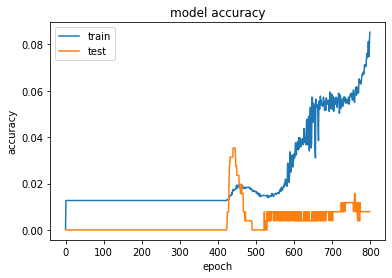

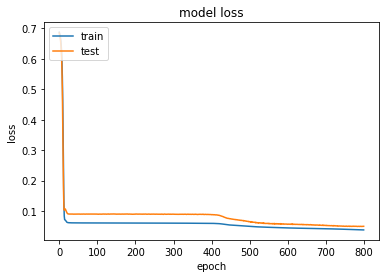

In [20]:
model.evaluate(ff,Y)
plotHistory(history)

In [21]:
# model.load_weights(checkpoint_path)
model.save_weights(checkpoint_path)
# model.save('../model/survey_short_full')


In [22]:
all_predict=model.predict(ff[:])
error_matrix=(np.absolute(Y - all_predict) > .5).astype(int)
_total = error_matrix.sum()
print(_total, len(Y), _total / len(Y), _total / len(Y) / len(Y[0]))
print(np.average(error_matrix.sum(axis=1) / len(Y[0])))

20633 2543 8.113645300825796 0.012677570782540306
0.012677570782540308


In [45]:
expect.columns

Index(['Academic Medical Centers - Desktop', 'Account Management - Desktop',
       'Account Management - Phone/Tablet Sites and Apps',
       'Ad Revenue Model (Media) - Desktop',
       'Ad Revenue Model (Media) - Phone/Tablet Sites',
       'Ad Revenue Model - Desktop', 'Ad Revenue Model - Phone/Tablet Sites',
       'Ad Revenue Model - Phone/Tablet Sites and Apps',
       'Agencies with Statistical Resources - Desktop', 'Airlines - Desktop',
       ...
       'Vacation Packages - Desktop', 'Vision Care - Desktop',
       'Web Search Portals - Desktop',
       'Web Search Portals - Phone/Tablet Sites and Apps',
       'Wireless - Phone/Tablet Sites and Apps',
       'Workshops - In-Location Services',
       'eCommerce (Private Sector) - Desktop', 'eCommerce - Contact Center',
       'eCommerce - Phone/Tablet Sites and Apps', 'eGov - Desktop'],
      dtype='object', length=640)

In [47]:
full_expect = raw_data[raw_data.columns[1:(len(raw_data.columns)-1)]]
np_pred = (all_predict > 0.5).astype(int)
full_predict = full_expect.copy()
for col in full_expect.columns:
    full_predict[col].values[:] = 0
for idx, name in enumerate (_cat_list) :
    full_predict[name] = np_pred[:,idx]
full_predict = full_predict[full_expect.columns]
full_error=np.absolute(np.array(full_expect) - np.array(full_predict))
_total = full_error.sum()
print('Wrong:', _total, len(full_error), 'Wrong in row:', _total / len(full_error), _total / len(full_error) / len(full_error[0]))

# print('Wrong:', _total, len(full_error), 'Wrong in row:', ((double) _total) / len(full_error), 
#       ((double)_total) / len(full_error) / len(full_error[0]))

NameError: name 'idx' is not defined

In [41]:
full_expect = raw_data[raw_data.columns[1:(len(raw_data.columns)-1)]]
np_pred = (all_predict > 0.5).astype(int)
full_predict = np_pred
full_error=np.absolute(np.array(full_expect) - np.array(full_predict))
_total = full_error.sum()
print('Wrong:', _total, len(full_error), 'Wrong in row:', _total / len(full_error), _total / len(full_error) / len(full_error[0]))

Wrong: 20633 2543 Wrong in row: 8.113645300825796 0.012677570782540306


In [48]:
full_expect.columns

Index(['Academic Medical Centers - Desktop', 'Account Management - Desktop',
       'Account Management - Phone/Tablet Sites and Apps',
       'Ad Revenue Model (Media) - Desktop',
       'Ad Revenue Model (Media) - Phone/Tablet Sites',
       'Ad Revenue Model - Desktop', 'Ad Revenue Model - Phone/Tablet Sites',
       'Ad Revenue Model - Phone/Tablet Sites and Apps',
       'Agencies with Statistical Resources - Desktop', 'Airlines - Desktop',
       ...
       'Vacation Packages - Desktop', 'Vision Care - Desktop',
       'Web Search Portals - Desktop',
       'Web Search Portals - Phone/Tablet Sites and Apps',
       'Wireless - Phone/Tablet Sites and Apps',
       'Workshops - In-Location Services',
       'eCommerce (Private Sector) - Desktop', 'eCommerce - Contact Center',
       'eCommerce - Phone/Tablet Sites and Apps', 'eGov - Desktop'],
      dtype='object', length=640)

In [51]:
type(all_predict)

numpy.ndarray

In [39]:
for idx, name in enumerate (_cat_list) :
    print(idx)
#     full_predict[name] = np_pred[:,idx]

In [37]:
full_expect.head()

# type(_total)
# _total

,Academic Medical Centers - Desktop,Account Management - Desktop,Account Management - Phone/Tablet Sites and Apps,Ad Revenue Model (Media) - Desktop,Ad Revenue Model (Media) - Phone/Tablet Sites,Ad Revenue Model - Desktop,Ad Revenue Model - Phone/Tablet Sites,Ad Revenue Model - Phone/Tablet Sites and Apps,Agencies with Statistical Resources - Desktop,Airlines - Desktop,...,Vacation Packages - Desktop,Vision Care - Desktop,Web Search Portals - Desktop,Web Search Portals - Phone/Tablet Sites and Apps,Wireless - Phone/Tablet Sites and Apps,Workshops - In-Location Services,eCommerce (Private Sector) - Desktop,eCommerce - Contact Center,eCommerce - Phone/Tablet Sites and Apps,eGov - Desktop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '../checkpoint/js')